In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


This notebook aims to classify fantastic trees and give some clues about where to find them in the 4 wilderness areas of the Roosevelt National Forest of Northern Colorado!

The notebook will follow the workflow:

1) Undserstand, Clean and Format Data

2) Exploratory Data Analysis

3) Feature Engineering & Selection

4) Compare Several Machine Learning Models

5) Perform Hyperparameter Tuning on the Best Model

6) Evaluate the Best Model with Test Data

7) Interpret Model Results

#Load the data and navigate the current working directory

In [ ]:
%cd /content/gdrive/MyDrive/cs598_2

/content/gdrive/MyDrive/cs598_2


In [ ]:
!ls

sampleSubmission  test	train


#Understand, Clean and Format Data

To understand how data is structured, We are going to look at:

First and last rows
Information
Descriptive statistics of the dataset.
and apply cleaning and formatting afterwards, if necessary

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
train=pd.read_csv('train/train.csv')
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [ ]:
abs(train.corr()['Cover_Type'].sort_values(ascending=False))

Cover_Type                            1.000000
Soil_Type38                           0.257810
Soil_Type39                           0.240384
Soil_Type40                           0.205851
Soil_Type10                           0.128972
Wilderness_Area3                      0.122146
Soil_Type35                           0.114327
Id                                    0.108363
Slope                                 0.087722
Wilderness_Area4                      0.075774
Vertical_Distance_To_Hydrology        0.075647
Soil_Type37                           0.071210
Soil_Type17                           0.042453
Soil_Type13                           0.040528
Soil_Type5                            0.027692
Soil_Type36                           0.025726
Soil_Type2                            0.022627
Soil_Type14                           0.022019
Elevation                             0.016090
Soil_Type1                            0.015069
Wilderness_Area2                      0.014994
Soil_Type11  

In [ ]:
x=train.drop(['Id','Cover_Type'],axis=1)
y=train['Cover_Type']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [ ]:
def classify(x, y):
    k=KNeighborsClassifier()
    svc=SVC()
    d=DecisionTreeClassifier()
    log=LogisticRegression()
    rf=RandomForestClassifier()
    
    #random_state is the seed to create reproducible output
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)
    
    algos=[k,svc,d,log,rf]
    algos_name=['KNeigbors','SVC','DecisionTree','LogisticRegr','RandomForest']
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
   
    result=pd.DataFrame(columns=['AccuracyScore','PrecisionScore','RecallScore','f1_Score'],index=algos_name)
    
    for i in algos:
        
        predict=i.fit(x_train,y_train).predict(x_test)
        
        accuracy.append(accuracy_score(y_test,predict))
        precision.append(precision_score(y_test,predict,average='micro'))
        recall.append(recall_score(y_test,predict,average='micro'))
        f1.append(f1_score(y_test,predict,average='micro'))
        

    
    
    # correctness of predictions
    result.AccuracyScore=accuracy
    # The precision is the ratio tp / (tp + fp) where tp is the number of true positives and 
    # fp the number of false positives. The precision is intuitively the ability of the 
    # classifier not to label as positive a sample that is negative
    result.PrecisionScore=precision
    # The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn 
    # the number of false negatives. The recall is intuitively the ability of the classifier 
    # to find all the positive samples.
    result.RecallScore=recall
    # The F1 score can be interpreted as a harmonic mean of the precision and recall,
    # F1 = 2 * (precision * recall) / (precision + recall)
    result.f1_Score=f1
    
    # more metrics: https://scikit-learn.org/stable/modules/model_evaluation.html
    
    
    ret = result.sort_values('f1_Score',ascending=False)
    bestModelName = ret.iloc[0].name
    bestModel = algos[algos_name.index(bestModelName)]
    return (ret, bestModel)

In [ ]:
results = classify(x,y)
results[0]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,AccuracyScore,PrecisionScore,RecallScore,f1_Score
RandomForest,0.871032,0.871032,0.871032,0.871032
KNeigbors,0.804894,0.804894,0.804894,0.804894
DecisionTree,0.790675,0.790675,0.790675,0.790675
SVC,0.625661,0.625661,0.625661,0.625661
LogisticRegr,0.474537,0.474537,0.474537,0.474537


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=42)
model = results[1]
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.8658730158730159

In [ ]:
test = pd.read_csv('test/test.csv')
test.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
predict=model.predict(test.drop(labels=['Id'],axis=1))
submission= pd.DataFrame(data = predict,columns = ['Cover_Type'])
submission.head()

,Cover_Type
0,2
1,1
2,2
3,2
4,2


In [ ]:
# for data manipulation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', 60)

# for visualization
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
%matplotlib inline
# to include graphs inline within the frontends next to code
import seaborn as sns
sns.set_context(font_scale=2)

# to bypass warnings in various dataframe assignments
pd.options.mode.chained_assignment = None

# machine learning models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# preprocessing functions and evaluation models
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler


In [ ]:
trees = pd.read_csv("train/train.csv")
print("Number of rows and columns in the trees dataset are:", trees.shape)

Number of rows and columns in the trees dataset are: (15120, 56)


Information (how many rows and columns, data types and non-null values) and descriptive statistics of the dataset

In [2]:
display(trees.info())

In [ ]:
display(trees.describe())

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,0.237897,0.033003,0.419907,0.309193,0.023479,0.041204,0.063624,0.055754,0.010913,0.042989,0.0,0.000066,0.000661,0.141667,0.026852,0.015013,0.031481,0.011177,0.0,0.007540,0.040476,0.003968,0.003042,0.009193,0.001058,0.022817,0.050066,0.016997,0.000066,0.003571,0.000992,0.000595,0.085384,0.047950,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,0.425810,0.178649,0.493560,0.462176,0.151424,0.198768,0.244091,0.229454,0.103896,0.202840,0.0,0.008133,0.025710,0.348719,0.161656,0.121609,0.174621,0.105133,0.0,0.086506,0.197080,0.062871,0.055075,0.095442,0.032514,0.149326,0.218089,0.129265,0.008133,0.059657,0.031482,0.024391,0.279461,0.213667,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

Check for Anomalies & Outliers
To help future ML model to grasp patterns in the data better, We are going to search for outliers. During this search, We will use the logic of extreme outliers to keep as much rows we can keep. So following data points will be dropped if they satisfy the following conditions:

x < Q1 - 3 * IQR
x > Q3 + 3 * IQR

In [ ]:
def outlier_function(df, col_name):
    ''' this function detects first and third quartile and interquartile range for a given column of a dataframe
    then calculates upper and lower limits to determine outliers conservatively
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count


In [ ]:
# loop through all columns to see if there are any outliers
for column in trees.columns:
    if outlier_function(trees, column)[2] > 0:
        print("There are {} outliers in {}".format(outlier_function(trees, column)[2], column))

There are 53 outliers in Horizontal_Distance_To_Hydrology
There are 49 outliers in Vertical_Distance_To_Hydrology
There are 3 outliers in Horizontal_Distance_To_Roadways
There are 7 outliers in Hillshade_9am
There are 20 outliers in Hillshade_Noon
There are 132 outliers in Horizontal_Distance_To_Fire_Points
There are 3597 outliers in Wilderness_Area1
There are 499 outliers in Wilderness_Area2
There are 355 outliers in Soil_Type1
There are 623 outliers in Soil_Type2
There are 962 outliers in Soil_Type3
There are 843 outliers in Soil_Type4
There are 165 outliers in Soil_Type5
There are 650 outliers in Soil_Type6
There are 1 outliers in Soil_Type8
There are 10 outliers in Soil_Type9
There are 2142 outliers in Soil_Type10
There are 406 outliers in Soil_Type11
There are 227 outliers in Soil_Type12
There are 476 outliers in Soil_Type13
There are 169 outliers in Soil_Type14
There are 114 outliers in Soil_Type16
There are 612 outliers in Soil_Type17
There are 60 outliers in Soil_Type18
There a

Considering the Horizaontal_Distance_To_Firepoints having the highest number of outliers and widest data range, We are going to remove outliers only from that column.

In [ ]:
trees = trees[(trees['Horizontal_Distance_To_Fire_Points'] > outlier_function(trees, 'Horizontal_Distance_To_Fire_Points')[0]) &
              (trees['Horizontal_Distance_To_Fire_Points'] < outlier_function(trees, 'Horizontal_Distance_To_Fire_Points')[1])]
trees.shape

(14988, 56)

#Exploratory Data Analysis

 Check if Wilderness_Area and Soil_Type columns have only binary values

In [ ]:
# list of columns of wilderness areas and soil types
is_binary_columns = [column for column in trees.columns if ("Wilderness" in column) | ("Soil" in column)]
pd.unique(trees[is_binary_columns].values.ravel())

array([1, 0])

Can one Tree belong to multiple soil types and wilderness areas ?

In [ ]:
# sum of all widerness area columns
trees["w_sum"] = trees["Wilderness_Area1"] + trees["Wilderness_Area2"] + trees["Wilderness_Area3"] + trees["Wilderness_Area4"]
print(trees.w_sum.value_counts())

1    14988
Name: w_sum, dtype: int64


In [ ]:
# create a list of soil_type columns
soil_columns = [c for c in trees.columns if "Soil" in c]
trees["soil_sum"] = 0

# sum of all soil type columns
for c in soil_columns:
    trees["soil_sum"] += trees[c]

print(trees.soil_sum.value_counts())

1    14988
Name: soil_sum, dtype: int64


Distribution of the Trees

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


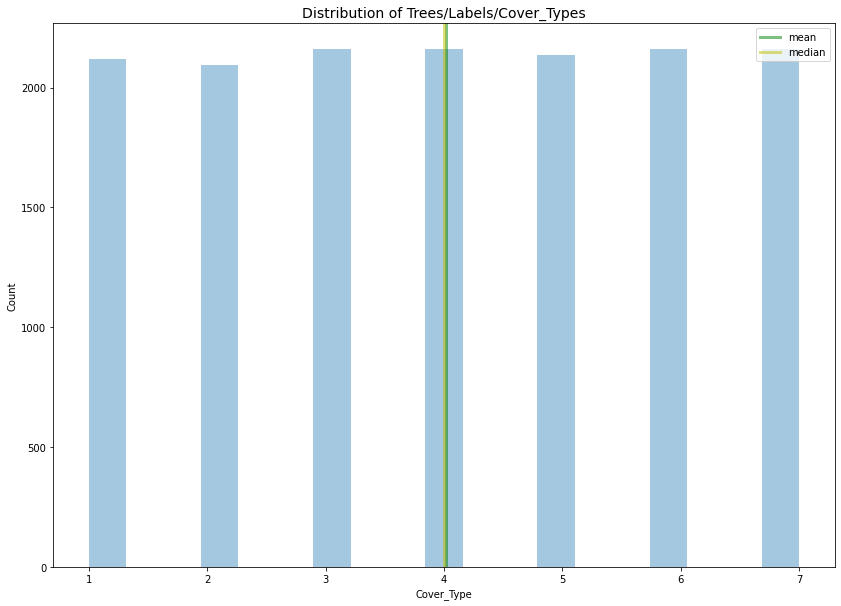

In [ ]:
# set the plot size
figsize(14,10)

# set the histogram, mean and median
sns.distplot(trees["Cover_Type"], kde=False)
plt.axvline(x=trees.Cover_Type.mean(), linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline(x=trees.Cover_Type.median(), linewidth=3, color='y', label="median", alpha=0.5)

# set title, legends and labels
plt.xlabel("Cover_Type")
plt.ylabel("Count")
plt.title("Distribution of Trees/Labels/Cover_Types", size=14)
plt.legend(["mean", "median"])

Check if the Cover_Type shows non-uniform distribution among different Wilderness_Areas

Text(0.5, 1.0, 'Density of Cover Types Among Different Wilderness Areas')

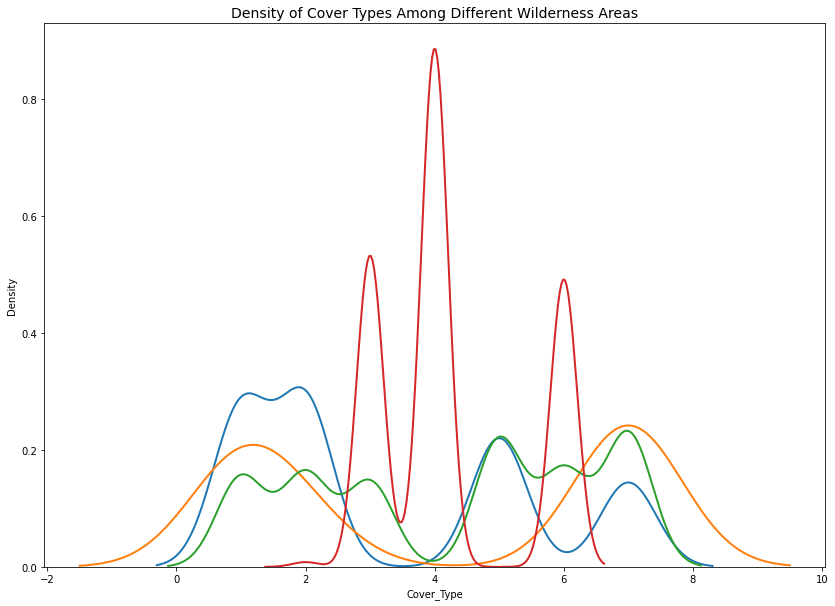

In [ ]:
# Create one column as Wilderness_Area_Type and represent it as categorical data
trees['Wilderness_Area_Type'] = (trees.iloc[:, 11:15] == 1).idxmax(1)

#list of wilderness areas
wilderness_areas = sorted(trees['Wilderness_Area_Type'].value_counts().index.tolist())

# distribution of the cover type in different wilderness areas
figsize(14,10)

# plot cover_type distribution for each wilderness area
for area in wilderness_areas:
    subset = trees[trees['Wilderness_Area_Type'] == area]
    sns.kdeplot(subset["Cover_Type"], label=area, linewidth=2)

# set title, legends and labels
plt.ylabel("Density")
plt.xlabel("Cover_Type")
plt.title("Density of Cover Types Among Different Wilderness Areas", size=14)


Understanding the Soil_Type and Cover_Type relationship

Since different soil types might appear in different wilderness areas, We are going to consider different wilderness areas while examining this relationship.

In [ ]:
def split_numbers_chars(row):
    '''This function fetches the numerical characters at the end of a string
    and returns alphabetical character and numerical chaarcters respectively'''
    head = row.rstrip('0123456789')
    tail = row[len(head):]
    return head, tail

def reverse_one_hot_encode(dataframe, start_loc, end_loc, numeric_column_name):
    ''' this function takes the start and end location of the one-hot-encoded column set and numeric column name to be created as arguments
    1) transforms one-hot-encoded columns into one column consisting of column names with string data type
    2) splits string column into the alphabetical and numerical characters
    3) fetches numerical character and creates numeric column in the given dataframe
    '''
    dataframe['String_Column'] = (dataframe.iloc[:, start_loc:end_loc] == 1).idxmax(1)
    dataframe['Tuple_Column'] = dataframe['String_Column'].apply(split_numbers_chars)
    dataframe[numeric_column_name] = dataframe['Tuple_Column'].apply(lambda x: x[1]).astype('int64')
    dataframe.drop(columns=['String_Column','Tuple_Column'], inplace=True)

In [ ]:
reverse_one_hot_encode(trees, 16, 56, "Soil_Type")

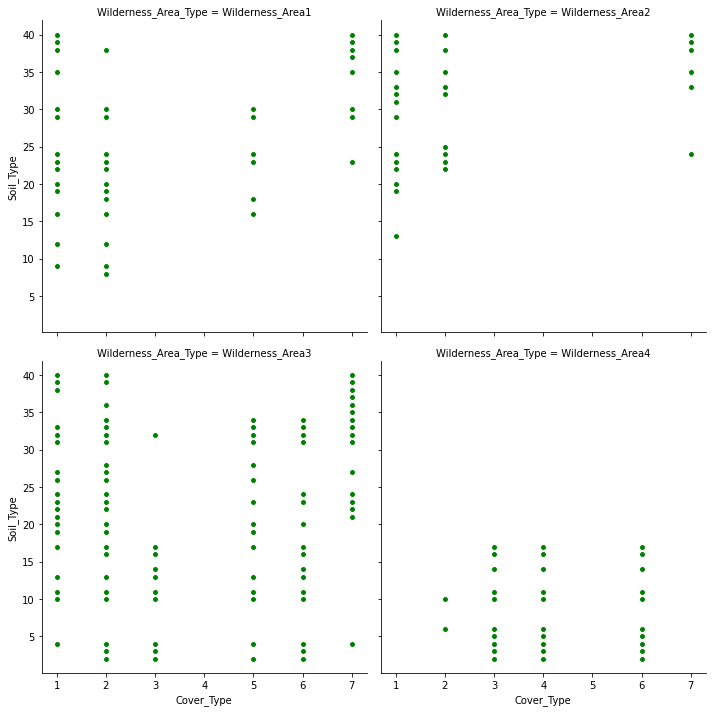

In [ ]:
# plot relationship of soil type and cover type among different wilderness areas
g = sns.FacetGrid(trees, col="Wilderness_Area_Type", 
                  col_wrap=2, height=5, col_order=wilderness_areas)
g = g.map(plt.scatter,"Cover_Type", "Soil_Type", edgecolor="w", color="g")

Distribution and relationship of continuous variables (Elevation, Aspect, Slope, Distance and Hillsahde columns)

In [ ]:
# store continious variables in a list
continuous_variables = trees.columns[1:11].tolist()

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

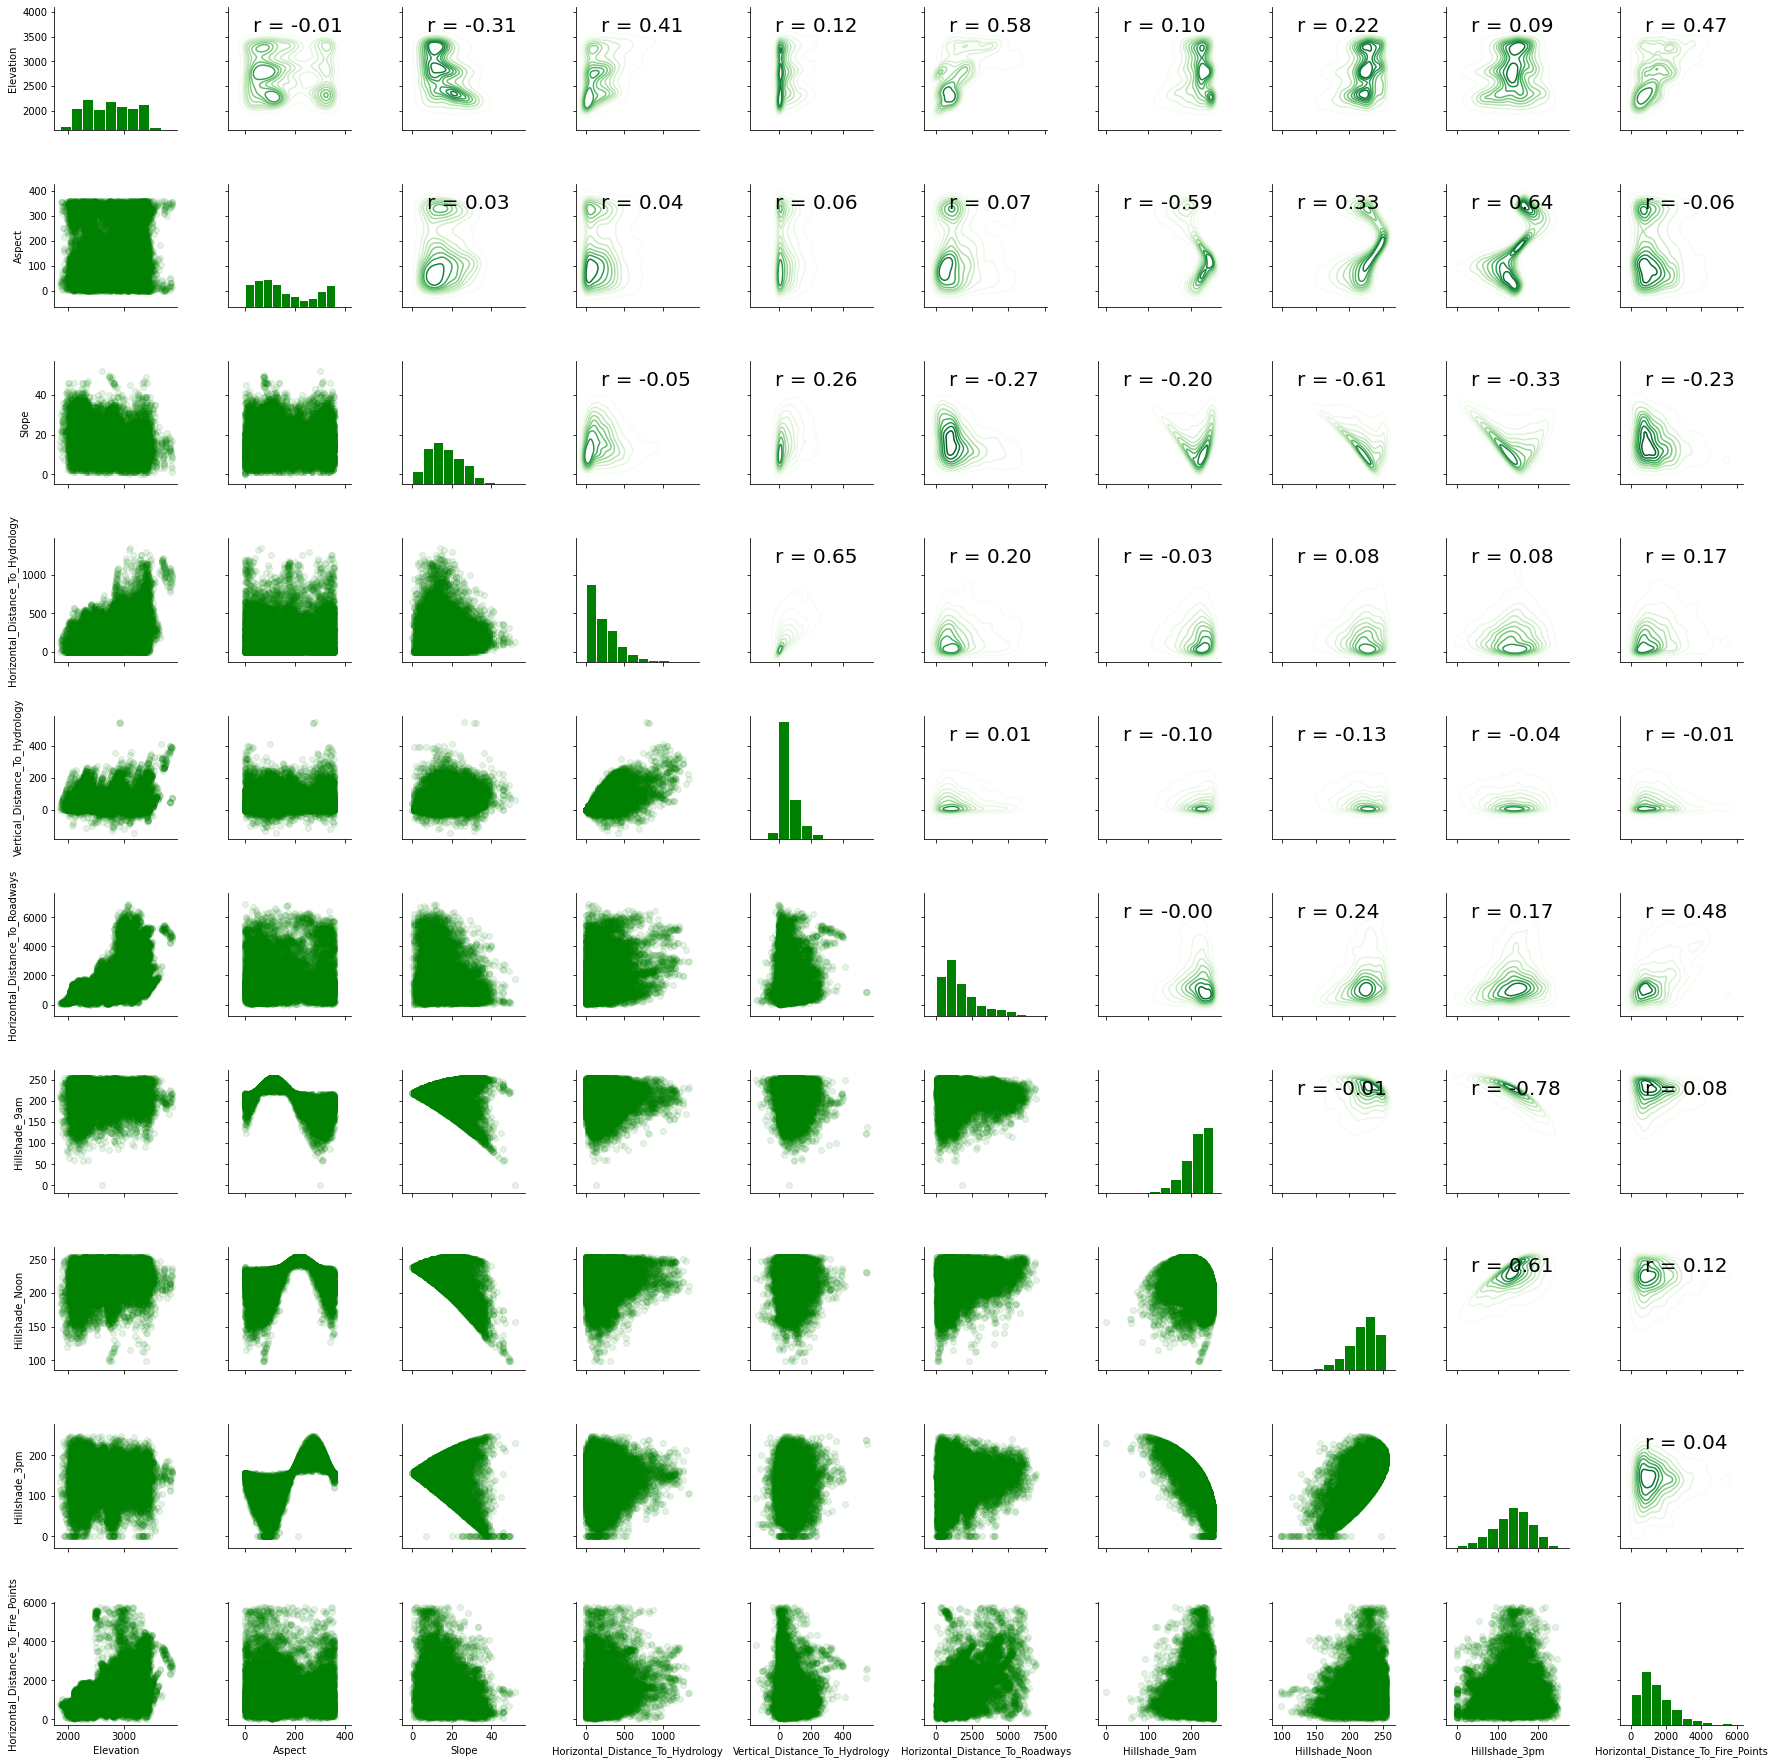

In [ ]:
# Create the pairgrid object
grid = sns.PairGrid(data = trees[continuous_variables])

# Upper is a correlation and kdeplot
grid.map_upper(corr_func);
grid.map_upper(sns.kdeplot, cmap = plt.cm.Greens)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'green', edgecolor = 'white')

# Bottom is scatter plot
grid.map_lower(plt.scatter, color = 'green', alpha = 0.1)


Visualize some collinear features with Cover_Type

Text(0.5, 1.0, 'Elevation VS Slope')

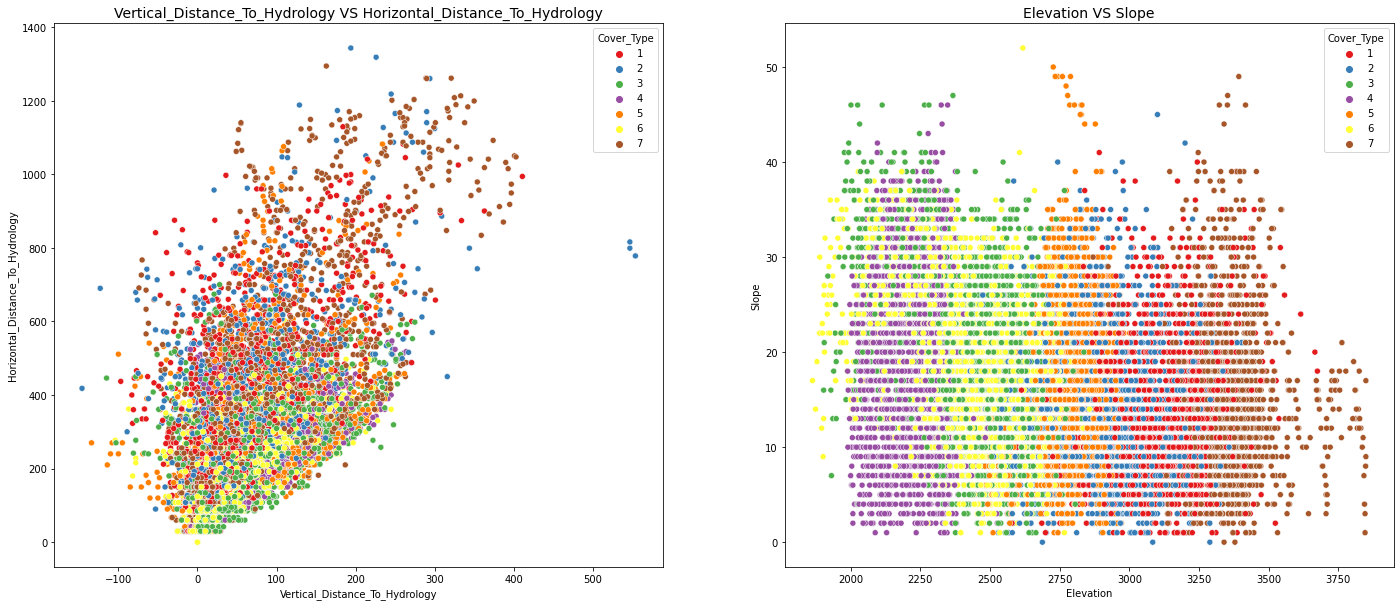

In [ ]:
figsize(24,10)

# plot the first subplot
plt.subplot(1,2,1)
sns.scatterplot(x="Vertical_Distance_To_Hydrology", y="Horizontal_Distance_To_Hydrology", 
                hue="Cover_Type", data=trees, 
                legend="full", hue_norm=(0,8), palette="Set1")
plt.title("Vertical_Distance_To_Hydrology VS Horizontal_Distance_To_Hydrology", size=14)

# plot the second subplot
plt.subplot(1,2,2)
sns.scatterplot(x="Elevation", y="Slope", 
                hue="Cover_Type", data=trees, 
                legend="full", hue_norm=(0,8), palette="Set1")
plt.title("Elevation VS Slope", size=14)


Text(0.5, 1.0, 'Hillshade_9am VS Hillshade_3pm')

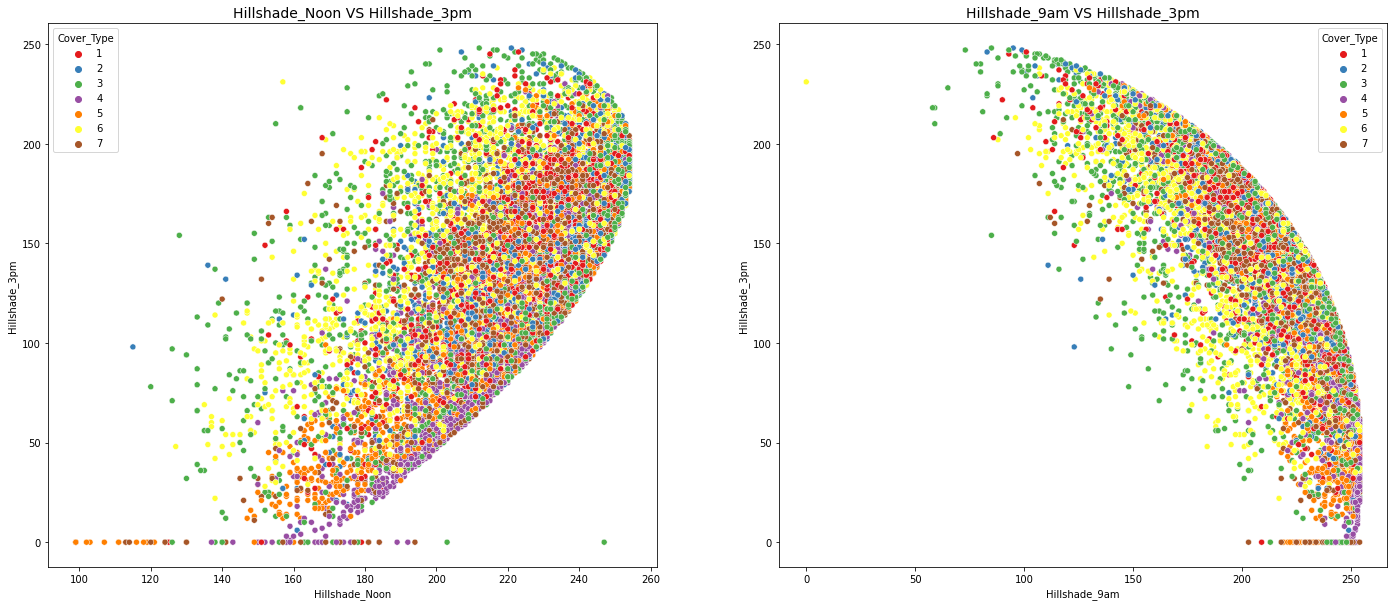

In [ ]:
figsize(24,10)

# plot the first subplot
plt.subplot(1,2,1)
sns.scatterplot(x="Hillshade_Noon", y="Hillshade_3pm", 
                hue="Cover_Type", data=trees, 
                legend="full", hue_norm=(0,8), palette="Set1")
plt.title("Hillshade_Noon VS Hillshade_3pm", size=14)

# plot the second subplot
plt.subplot(1,2,2)
sns.scatterplot(x="Hillshade_9am", y="Hillshade_3pm", 
                hue="Cover_Type", data=trees, 
                legend="full", hue_norm=(0,8), palette="Set1")
plt.title("Hillshade_9am VS Hillshade_3pm", size=14)

Text(0.5, 1.05, 'Pearson Correlation of All Features')

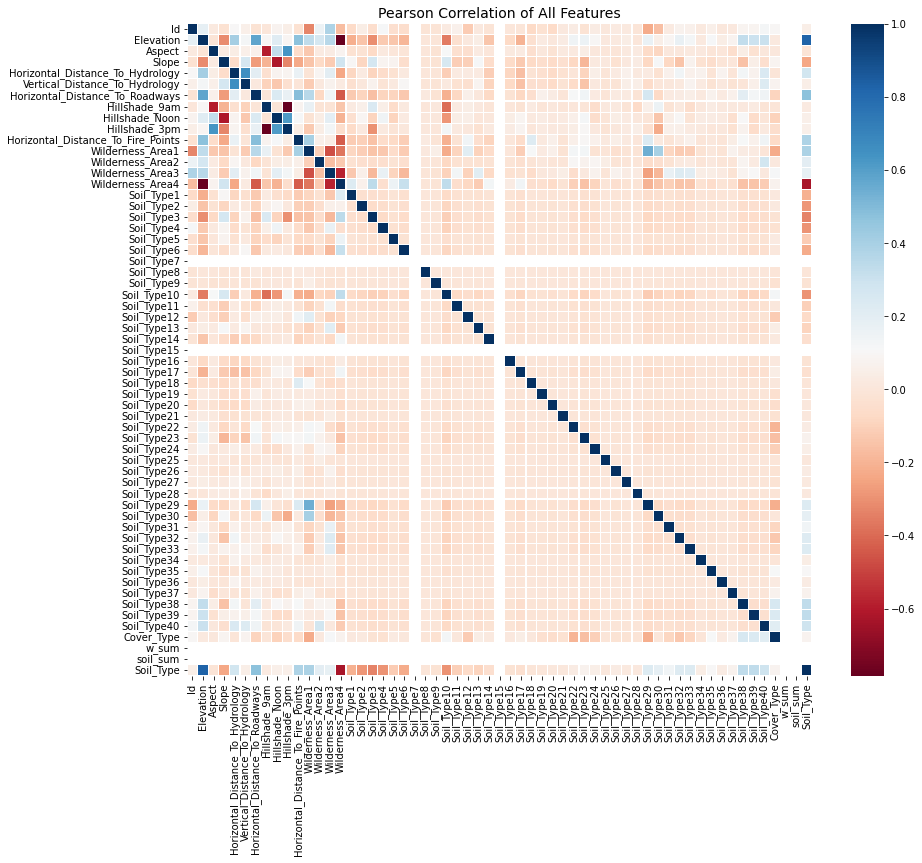

In [ ]:
plt.figure(figsize=(14,12))

# plot heatmap set the title
colormap = plt.cm.RdBu
sns.heatmap(trees.corr(),linewidths=0.1,vmax=1.0, 
            square=False, cmap=colormap, linecolor='white', annot=False)
plt.title('Pearson Correlation of All Features', y=1.05, size=14)

Text(0.5, 1.0, 'Pearson Correlation of Features with Numeric Soil_Type')

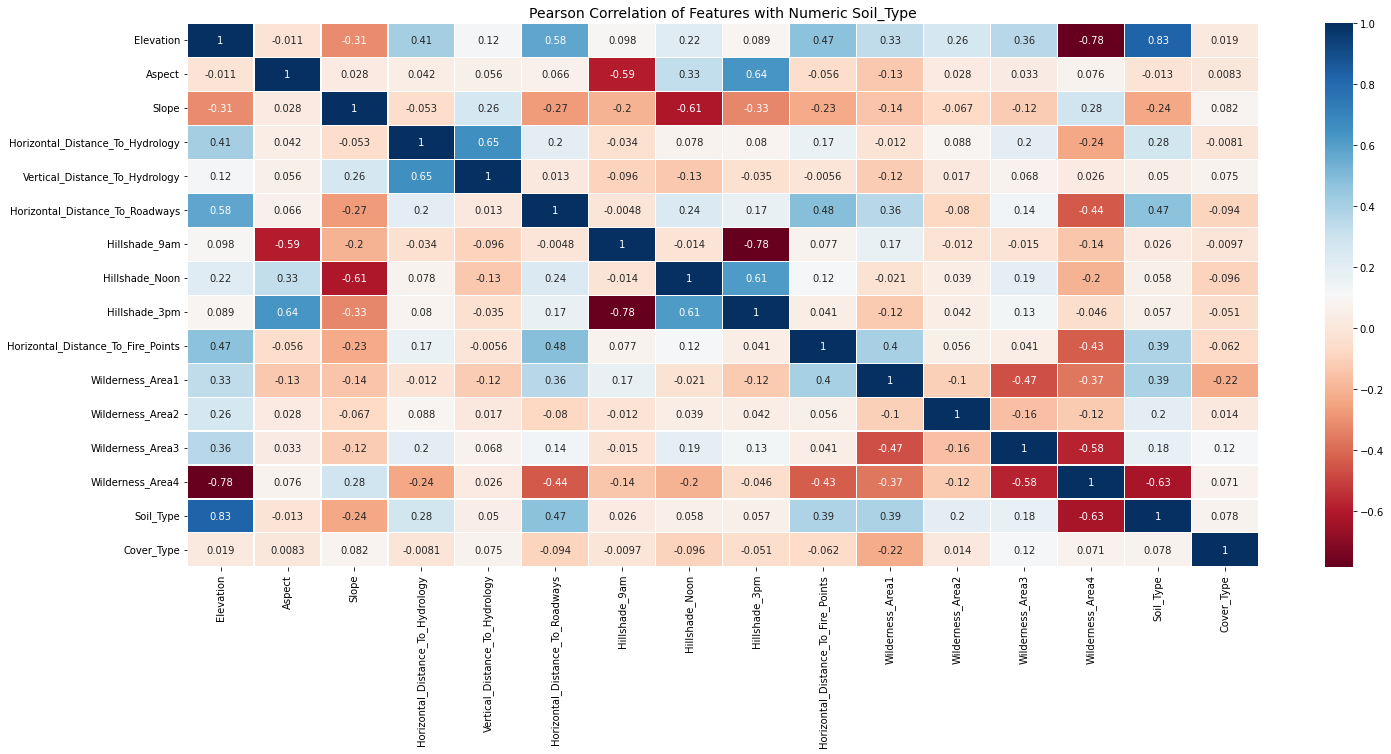

In [ ]:
# make a list of numeric features and create a dataframe with them
all_features_w_label = continuous_variables + wilderness_areas + ["Soil_Type"] + ["Cover_Type"]
trees_w_numeric_soil = trees[all_features_w_label]

# pearson coefficients with numeric soil type column
correlations = pd.DataFrame(trees_w_numeric_soil.corr())

figsize=(16,14)

# plot the heatmap
colormap = plt.cm.RdBu
sns.heatmap(correlations,linewidths=0.1, 
            square=False, cmap=colormap, linecolor='white', annot=True)
plt.title('Pearson Correlation of Features with Numeric Soil_Type', size=14)

In [ ]:
# add columns
trees_w_numeric_soil['Euclidian_Distance_To_Hydrology'] = (trees_w_numeric_soil['Horizontal_Distance_To_Hydrology']**2 + 
                                                           trees_w_numeric_soil['Vertical_Distance_To_Hydrology']**2)**0.5
trees_w_numeric_soil['Mean_Elevation_Vertical_Distance_Hydrology'] = (trees_w_numeric_soil['Elevation'] + 
                                                                      trees_w_numeric_soil['Vertical_Distance_To_Hydrology'])/2
trees_w_numeric_soil['Mean_Distance_Hydrology_Firepoints'] = (trees_w_numeric_soil['Horizontal_Distance_To_Hydrology'] + 
                                                              trees_w_numeric_soil['Horizontal_Distance_To_Fire_Points'])/2
trees_w_numeric_soil['Mean_Distance_Hydrology_Roadways'] = (trees_w_numeric_soil['Horizontal_Distance_To_Hydrology'] + 
                                                            trees_w_numeric_soil['Horizontal_Distance_To_Roadways'])/2
trees_w_numeric_soil['Mean_Distance_Firepoints_Roadways'] = (trees_w_numeric_soil['Horizontal_Distance_To_Fire_Points'] + 
                                                             trees_w_numeric_soil['Horizontal_Distance_To_Roadways'])/2


In [ ]:
# add sqrt transformed columns to the trees_w_numeric_soil dataframe
for col in trees_w_numeric_soil.columns:
    if trees_w_numeric_soil[col].min() >= 0:
        if col == 'Cover_Type':
            next
        else:
            trees_w_numeric_soil['sqrt' + col] = np.sqrt(trees_w_numeric_soil[col])

In [ ]:
correlations_transformed = pd.DataFrame(trees_w_numeric_soil.corr())
correlations_transformed = pd.DataFrame(correlations_transformed["Cover_Type"]).reset_index()

# format, and display sorted correlations_transformed
correlations_transformed.columns = ["Feature", "Correlation with Cover_Type"]
correlations_transformed = (correlations_transformed[correlations_transformed["Feature"] != "Cover_Type"]
                .sort_values(by="Correlation with Cover_Type", ascending=True))
display(correlations_transformed)

,Feature,Correlation with Cover_Type
49,sqrtsqrtWilderness_Area1,-0.220713
30,sqrtWilderness_Area1,-0.220713
10,Wilderness_Area1,-0.220713
7,Hillshade_Noon,-0.095848
27,sqrtHillshade_Noon,-0.095399
46,sqrtsqrtHillshade_Noon,-0.095079
5,Horizontal_Distance_To_Roadways,-0.094212
20,Mean_Distance_Firepoints_Roadways,-0.092875
19,Mean_Distance_Hydrology_Roadways,-0.091495
39,sqrtMean_Distance_Firepoints_Roadways,-0.089852


In [ ]:
# final list of features
transformed_features = ['sqrtHorizontal_Distance_To_Hydrology', 'sqrtMean_Distance_Hydrology_Roadways', 'sqrtEuclidian_Distance_To_Hydrology', 
                        'Mean_Elevation_Vertical_Distance_Hydrology', 'Mean_Distance_Firepoints_Roadways', 'Mean_Distance_Hydrology_Firepoints',  ]

all_features =  (['Elevation', 'Aspect', 'Slope', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
                  'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points' ] + wilderness_areas +
                 ['Soil_Type'] + transformed_features)


In [ ]:

trees_training = trees_w_numeric_soil[all_features]
labels_training = trees_w_numeric_soil["Cover_Type"]

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(trees_training, labels_training, test_size=0.2, random_state=1)

In [ ]:
print('Training Data Shape:', X_train.shape)
print('Validation Data Shape:', X_valid.shape)

Training Data Shape: (11990, 19)
Validation Data Shape: (2998, 19)


In [ ]:
print('Training Label Shape:', y_train.shape)
print('Validation Label Shape:', y_valid.shape)

Training Label Shape: (11990,)
Validation Label Shape: (2998,)


In [ ]:
# Create dummy classifer
dummy = DummyClassifier(strategy='stratified', random_state=1)

# train the model
dummy.fit(X_train, y_train)

# Get accuracy score
baseline_accuracy = dummy.score(X_valid, y_valid)
print("Our dummy algorithm classified {:0.2f} of the of the trees correctly".format(baseline_accuracy))

Our dummy algorithm classified 0.14 of the of the trees correctly


In [ ]:
# create scaler
scaler = StandardScaler()

# apply normalization to training set and transform training set
X_train_scaled = scaler.fit_transform(X_train, y_train)

# transform validation set
X_valid_scaled = scaler.transform(X_valid)

In [ ]:
# function to train a given model, generate predictions, and return accuracy score
def fit_evaluate_model(model, X_train, y_train, X_valid, Y_valid):
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_valid)
    return accuracy_score(y_valid, y_predicted)

In [ ]:
# create model apply fit_evaluate_model
knn_classifier = KNeighborsClassifier()
knn_accuracy = fit_evaluate_model(knn_classifier, X_train_scaled, y_train, X_valid_scaled, y_valid)
print("Number of correct predictions made out of all predictions are:", knn_accuracy)

Number of correct predictions made out of all predictions are: 0.8025350233488993


In [ ]:
# create model apply fit_evaluate_model
lgbm_classifier = LGBMClassifier()
lgbm_accuracy = fit_evaluate_model(lgbm_classifier, X_train_scaled, y_train, X_valid_scaled, y_valid)
print("Number of correct predictions made out of all predictions are:", lgbm_accuracy)

Number of correct predictions made out of all predictions are: 0.8545697131420947


In [ ]:
# create model apply fit_evaluate_model
rf_classifier = RandomForestClassifier()
rf_accuracy = fit_evaluate_model(rf_classifier, X_train, y_train, X_valid, y_valid)
print("Number of correct predictions made out of all predictions are:", rf_accuracy)

Number of correct predictions made out of all predictions are: 0.8702468312208139


In [ ]:
# create model apply fit_evaluate_model
xrf_classifier = ExtraTreesClassifier()
xrf_accuracy = fit_evaluate_model(xrf_classifier, X_train, y_train, X_valid, y_valid)
print("Number of correct predictions made out of all predictions are:", xrf_accuracy)

Number of correct predictions made out of all predictions are: 0.8872581721147431


In [ ]:
# create model apply fit_evaluate_model
xgb_classifier = XGBClassifier()
xgb_accuracy = fit_evaluate_model(xgb_classifier, X_train, y_train, X_valid, y_valid)
print("Number of correct predictions made out of all predictions are:", xgb_accuracy)

Number of correct predictions made out of all predictions are: 0.7655103402268179


Text(0.5, 1.0, 'Accuracy Score of Different Models')

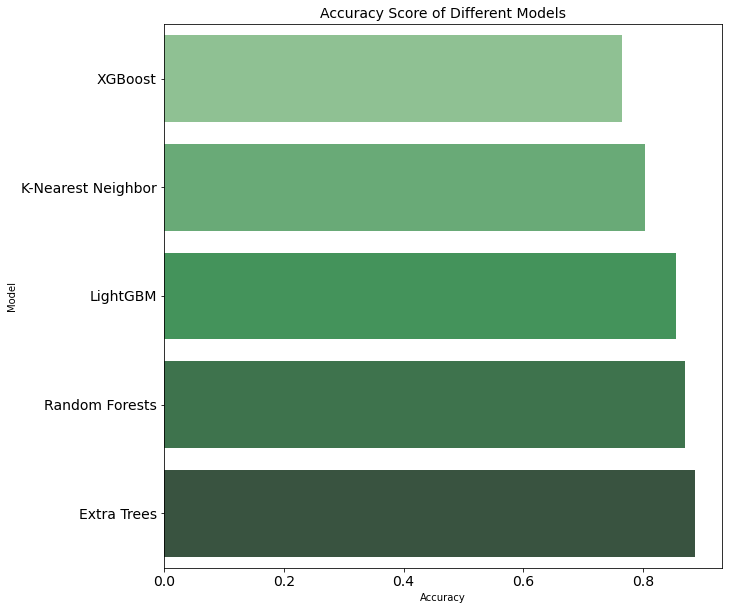

In [ ]:
# create dataframe of accuracy and model and sort values
performance_comparison = pd.DataFrame({"Model": ["K-Nearest Neighbor", "LightGBM", "Random Forests", "Extra Trees", "XGBoost"],
                                       "Accuracy": [knn_accuracy, lgbm_accuracy, rf_accuracy, xrf_accuracy, xgb_accuracy]})

performance_comparison = performance_comparison.sort_values(by="Accuracy", ascending=True)

# set the plot
plt.figure(figsize=(10,10))
ax = sns.barplot(x="Accuracy", y="Model", data=performance_comparison, palette="Greens_d")

# set title arrange labels
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Accuracy Score of Different Models", size=14)


In [ ]:
# The number of trees in the forest algorithm, default value is 10.
n_estimators = [50, 100, 300, 500, 1000]

# The minimum number of samples required to split an internal node, default value is 2.
min_samples_split = [2, 3, 5, 7, 9]

# The minimum number of samples required to be at a leaf node, default value is 1.
min_samples_leaf = [1, 2, 4, 6, 8]

# The number of features to consider when looking for the best split, default value is auto.
max_features = ['auto', 'sqrt', 'log2', None] 

# Define the grid of hyperparameters to search
hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}


In [ ]:
# create model
best_model = ExtraTreesClassifier(random_state=42)

# create Randomized search object
random_cv = RandomizedSearchCV(estimator=best_model,
                               param_distributions=hyperparameter_grid,
                               cv=5, n_iter=20, 
                               scoring = 'accuracy',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True, 
                               random_state=42)

In [ ]:
# Fit on the all training data using random search object
random_cv.fit(trees_training, labels_training)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 3, 5, 7, 9],
                                        'n_estimators': [50, 100, 300, 500,
                                                         1000]},
                   random_state=42, return_train_score=True, scoring='accuracy',
                   verbose=1)

In [ ]:
random_cv.best_estimator_

ExtraTreesClassifier(max_features=None, n_estimators=300, random_state=42)

In [ ]:
xrf_classifier_w_random_search = ExtraTreesClassifier(n_estimators=300, 
                                                     max_features=None, 
                                                     min_samples_leaf=1, 
                                                     min_samples_split=2,
                                                     random_state=42)

xrf_accuracy_opt_w_rand_search = fit_evaluate_model(xrf_classifier_w_random_search, X_train, y_train, X_valid, y_valid)

In [ ]:
print("Accuracy score in the previous extra random forests model:", xrf_accuracy)
print("Accuracy score after hyperparameter tuning:", xrf_accuracy_opt_w_rand_search)

Accuracy score in the previous extra random forests model: 0.8872581721147431
Accuracy score after hyperparameter tuning: 0.885923949299533


In [ ]:
# Create a range of trees to evaluate
trees_grid = {'n_estimators': [300, 500, 700, 900, 1200, 1500]}

# define all parameters except n_estimators
xrf_classifier_w_grid_search = ExtraTreesClassifier(max_features=None, 
                                                    min_samples_leaf=1, 
                                                    min_samples_split=2,
                                                    random_state=42)

# Grid Search Object using the trees range, the model and 5-fold cross validation
grid_search = GridSearchCV(estimator = xrf_classifier_w_grid_search, param_grid=trees_grid, 
                           cv = 5, scoring = 'accuracy', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [ ]:
# fit the dataset to grid search object
grid_search.fit(trees_training, labels_training)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=ExtraTreesClassifier(max_features=None, random_state=42),
             n_jobs=-1,
             param_grid={'n_estimators': [300, 500, 700, 900, 1200, 1500]},
             return_train_score=True, scoring='accuracy', verbose=1)

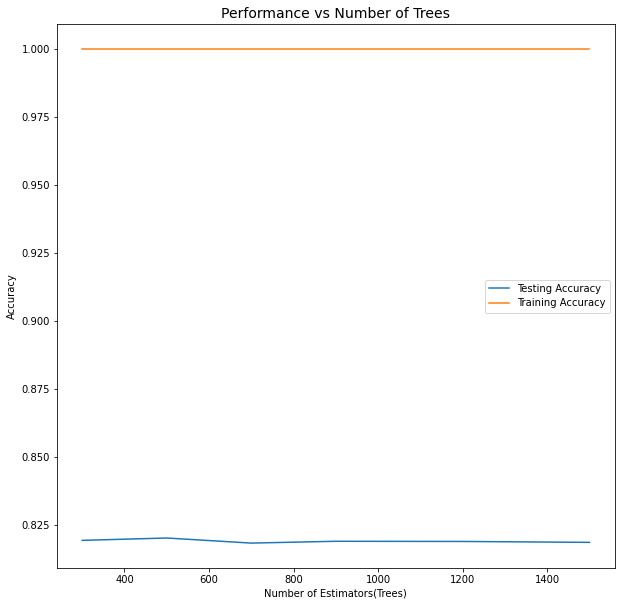

In [ ]:
# Get the results into a dataframe
xrf_results = pd.DataFrame(grid_search.cv_results_)

# Plot the training and testing error vs number of trees
plt.figure(figsize=(10,10))
plt.plot(xrf_results['param_n_estimators'], xrf_results['mean_test_score'], label = 'Testing Accuracy')
plt.plot(xrf_results['param_n_estimators'], xrf_results['mean_train_score'], label = 'Training Accuracy')

# set title, labels and legend
plt.xlabel('Number of Estimators(Trees)'); plt.ylabel('Accuracy'); plt.legend();
plt.title('Performance vs Number of Trees', size=14);

In [ ]:
xrf_results[["param_n_estimators", "params", "mean_test_score"]].sort_values(by="mean_test_score", ascending=False)

,param_n_estimators,params,mean_test_score
1,500,{'n_estimators': 500},0.820261
0,300,{'n_estimators': 300},0.819393
3,900,{'n_estimators': 900},0.819060
4,1200,{'n_estimators': 1200},0.818993
5,1500,{'n_estimators': 1500},0.818659
2,700,{'n_estimators': 700},0.818392


In [ ]:
xrf_optimal_model = ExtraTreesClassifier(n_estimators=500, 
                                           max_features=None, 
                                           min_samples_leaf=1, 
                                           min_samples_split=2,
                                           random_state=42)

xrf_optimal_model_accuracy = fit_evaluate_model(xrf_optimal_model, X_train, y_train, X_valid, y_valid)

In [ ]:
print("Accuracy score with random forests model when n_estimators=300:", xrf_accuracy_opt_w_rand_search)
print("Accuracy score with random forests model when n_estimators=500:", xrf_optimal_model_accuracy)

Accuracy score with random forests model when n_estimators=300: 0.885923949299533
Accuracy score with random forests model when n_estimators=500: 0.885923949299533


In [ ]:
# create set of y_predictions
y_predicted = xrf_optimal_model.predict(X_valid)

In [ ]:
# make a list of cover_types
cover_types = sorted(trees['Cover_Type'].value_counts().index.tolist())

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        # print("Normalized confusion matrix")
    # else:
        # print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

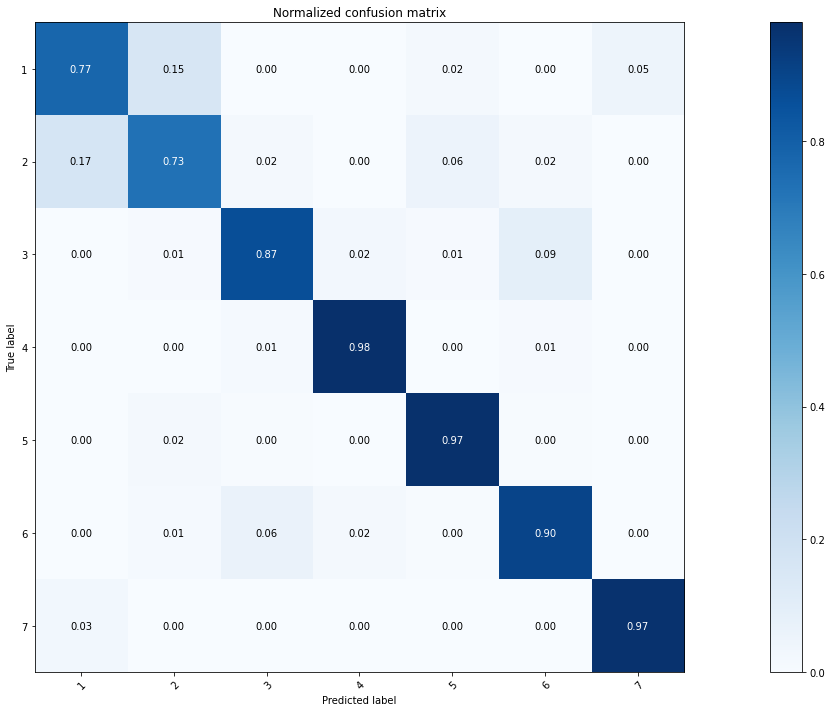

In [ ]:
plot_confusion_matrix(y_valid, y_predicted, classes=cover_types, normalize=True,
                      title='Normalized confusion matrix')
plt.show()